Aprendizado de máquinas (ML)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [10]:
dados = pd.read_excel('base_treino.xlsx')

In [11]:
dados.head()

,Tipo de pista,uso_solo,categoria,Periodo do dia,Condição metereologica,Ferido
0,Dupla,Urbano,final de semana e feriado,noite,Bom,Sim
1,Dupla,Rural,final de semana e feriado,noite,Bom,Não
2,Dupla,Urbano,final de semana e feriado,noite,Ruim,Não
3,Dupla,Rural,final de semana e feriado,noite,Ruim,Sim
4,Dupla,Urbano,final de semana e feriado,noite,Bom,Não


In [12]:
dados.columns

Index(['Tipo de pista', 'uso_solo', 'categoria', 'Periodo do dia',
       'Condição metereologica', 'Ferido'],
      dtype='object')

In [13]:
dados['Ferido'] = dados['Ferido'].replace({'Não': 0, 'Sim': 1})

C:\Users\aneca\AppData\Local\Temp\ipykernel_13580\481989792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['Ferido'] = dados['Ferido'].replace({'Não': 0, 'Sim': 1})


In [14]:
dados.head()

,Tipo de pista,uso_solo,categoria,Periodo do dia,Condição metereologica,Ferido
0,Dupla,Urbano,final de semana e feriado,noite,Bom,1
1,Dupla,Rural,final de semana e feriado,noite,Bom,0
2,Dupla,Urbano,final de semana e feriado,noite,Ruim,0
3,Dupla,Rural,final de semana e feriado,noite,Ruim,1
4,Dupla,Urbano,final de semana e feriado,noite,Bom,0


In [15]:
X = dados[['Tipo de pista','uso_solo','categoria','Periodo do dia','Condição metereologica']]
y = dados['Ferido']

In [16]:
# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Definir a pipeline
# Definindo as colunas categóricas e numéricas
categorical_features = ['Tipo de pista','uso_solo','categoria','Periodo do dia','Condição metereologica']


# Criar transformador de coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    #remainder='passthrough'  # Manter as colunas numéricas
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  # Modelo de regressão logística
])


In [18]:
# 5. Treinar o modelo
pipeline.fit(X_train, y_train)

# 6. Fazer previsões e avaliar o modelo
y_pred = pipeline.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1354
           1       0.83      1.00      0.91      6851

    accuracy                           0.83      8205
   macro avg       0.42      0.50      0.46      8205
weighted avg       0.70      0.83      0.76      8205



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
dados['Ferido'].value_counts(normalize=True)

Ferido
1    0.835925
0    0.164075
Name: proportion, dtype: float64

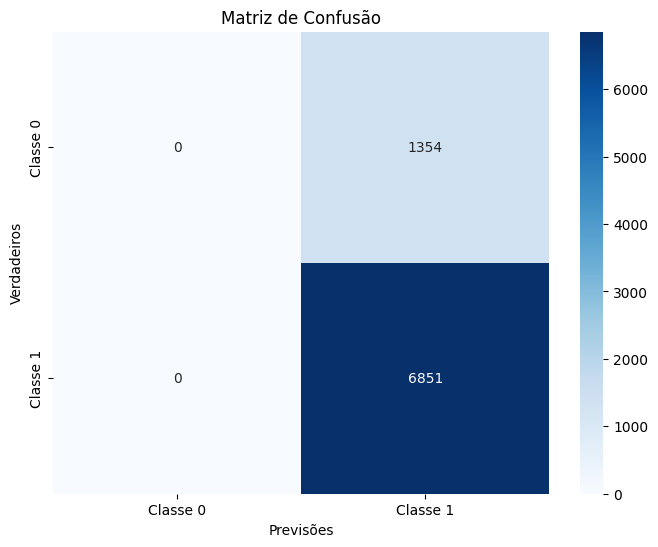

In [23]:
# 7. Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# 8. Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Classe 0', 'Classe 1'], 
             yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros')
plt.show()

Como está desbalanceado o modelo não consegue prever a classe 0 que se refere a não feridos, já que o dataset possui 86% de feridos.

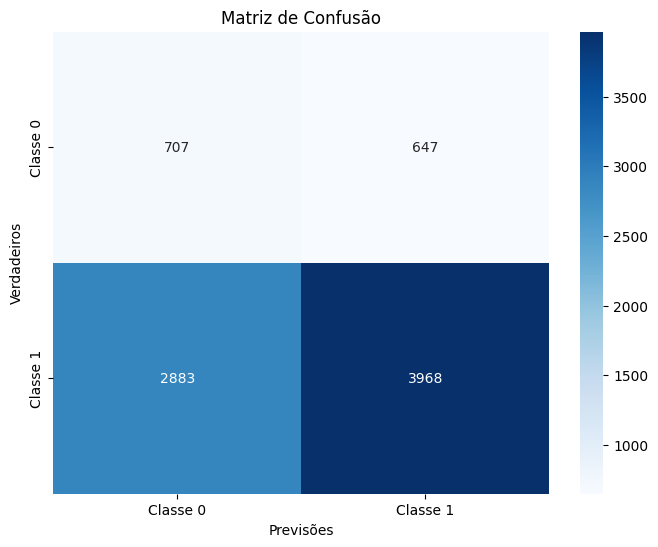

In [29]:
# Criar transformador para pré-processamento
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)  # Codificar características categóricas
    ],
    remainder='drop'  # Remover colunas não especificadas
)

# Criar a pipeline com RandomOverSampler e o classificador
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    #('oversampler', RandomOverSampler()),  # Adicionar RandomOverSampler
    ('classifier', LogisticRegression(class_weight="balanced"))  # O classificador desejado
])

# Treinar o modelo
pipeline1.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred1 = pipeline1.predict(X_test)

# 7. Gerar a matriz de confusão
cm1 = confusion_matrix(y_test, y_pred1)

# 8. Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Classe 0', 'Classe 1'], 
             yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros')
plt.show()



In [31]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.52      0.29      1354
           1       0.86      0.58      0.69      6851

    accuracy                           0.57      8205
   macro avg       0.53      0.55      0.49      8205
weighted avg       0.75      0.57      0.63      8205



Identificação de Acidentes: Se o objetivo principal for garantir que todos os acidentes de trânsito sejam identificados (por exemplo, em uma análise de segurança pública ou em um sistema de alerta), um alto recall é crucial. Isso significa que mesmo que algumas ocorrências sejam identificadas erroneamente, é mais importante garantir que o maior número possível de acidentes reais seja reconhecido.
Minimização de Consequências: Um alto recall pode ajudar a evitar consequências graves, pois se mais acidentes forem identificados, as autoridades podem tomar medidas preventivas mais eficazes.



In [36]:
# Aplicar RandomOverSampler no conjunto de treino
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)  # Codificar características categóricas
    ],
    remainder='drop'  # Remover colunas não especificadas
)

# Criar a pipeline com RandomOverSampler e o classificador
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    #('oversampler', RandomOverSampler()),  # Adicionar RandomOverSampler
    ('classifier', LogisticRegression(class_weight="balanced"))  # O classificador desejado
])

# Treinar a pipeline com os dados balanceados
pipeline2.fit(X_resampled, y_resampled)

# Fazer previsões e avaliar o modelo
y_pred2 = pipeline2.predict(X_test)

# # 7. Gerar a matriz de confusão
# cm2 = confusion_matrix(y_test, y_resampled)

# # 8. Plotar a matriz de confusão
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
#              xticklabels=['Classe 0', 'Classe 1'], 
#              yticklabels=['Classe 0', 'Classe 1'])
# plt.title('Matriz de Confusão')
# plt.xlabel('Previsões')
# plt.ylabel('Verdadeiros')
# plt.show()

print(classification_report(y_test, y_pred2))




              precision    recall  f1-score   support

           0       0.19      0.57      0.29      1354
           1       0.86      0.53      0.66      6851

    accuracy                           0.54      8205
   macro avg       0.53      0.55      0.47      8205
weighted avg       0.75      0.54      0.60      8205

